In [ ]:
!apt-get install poppler-utils
!pip install opencv-python-headless==4.1.2.30

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 0s (353 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 155320 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 21.8 M

In [ ]:
!pip install pdf2image
!pip install easyocr

     |████████████████████████████████| 63.6 MB 13.9 MB/s 


In [ ]:

from pdf2image import convert_from_path,convert_from_bytes 
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy

In [ ]:
reader = easyocr.Reader(['en','fr'])

In [ ]:
# Upload your paper PDF in CVPR/ICCV template
from google.colab import files

uploaded = files.upload()

for file_name in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=file_name, length=len(uploaded[file_name])))

Saving CV_Mayssa_METTALI.pdf to CV_Mayssa_METTALI.pdf
User uploaded file "CV_Mayssa_METTALI.pdf" with length 980957 bytes


In [ ]:
images =convert_from_path(file_name)

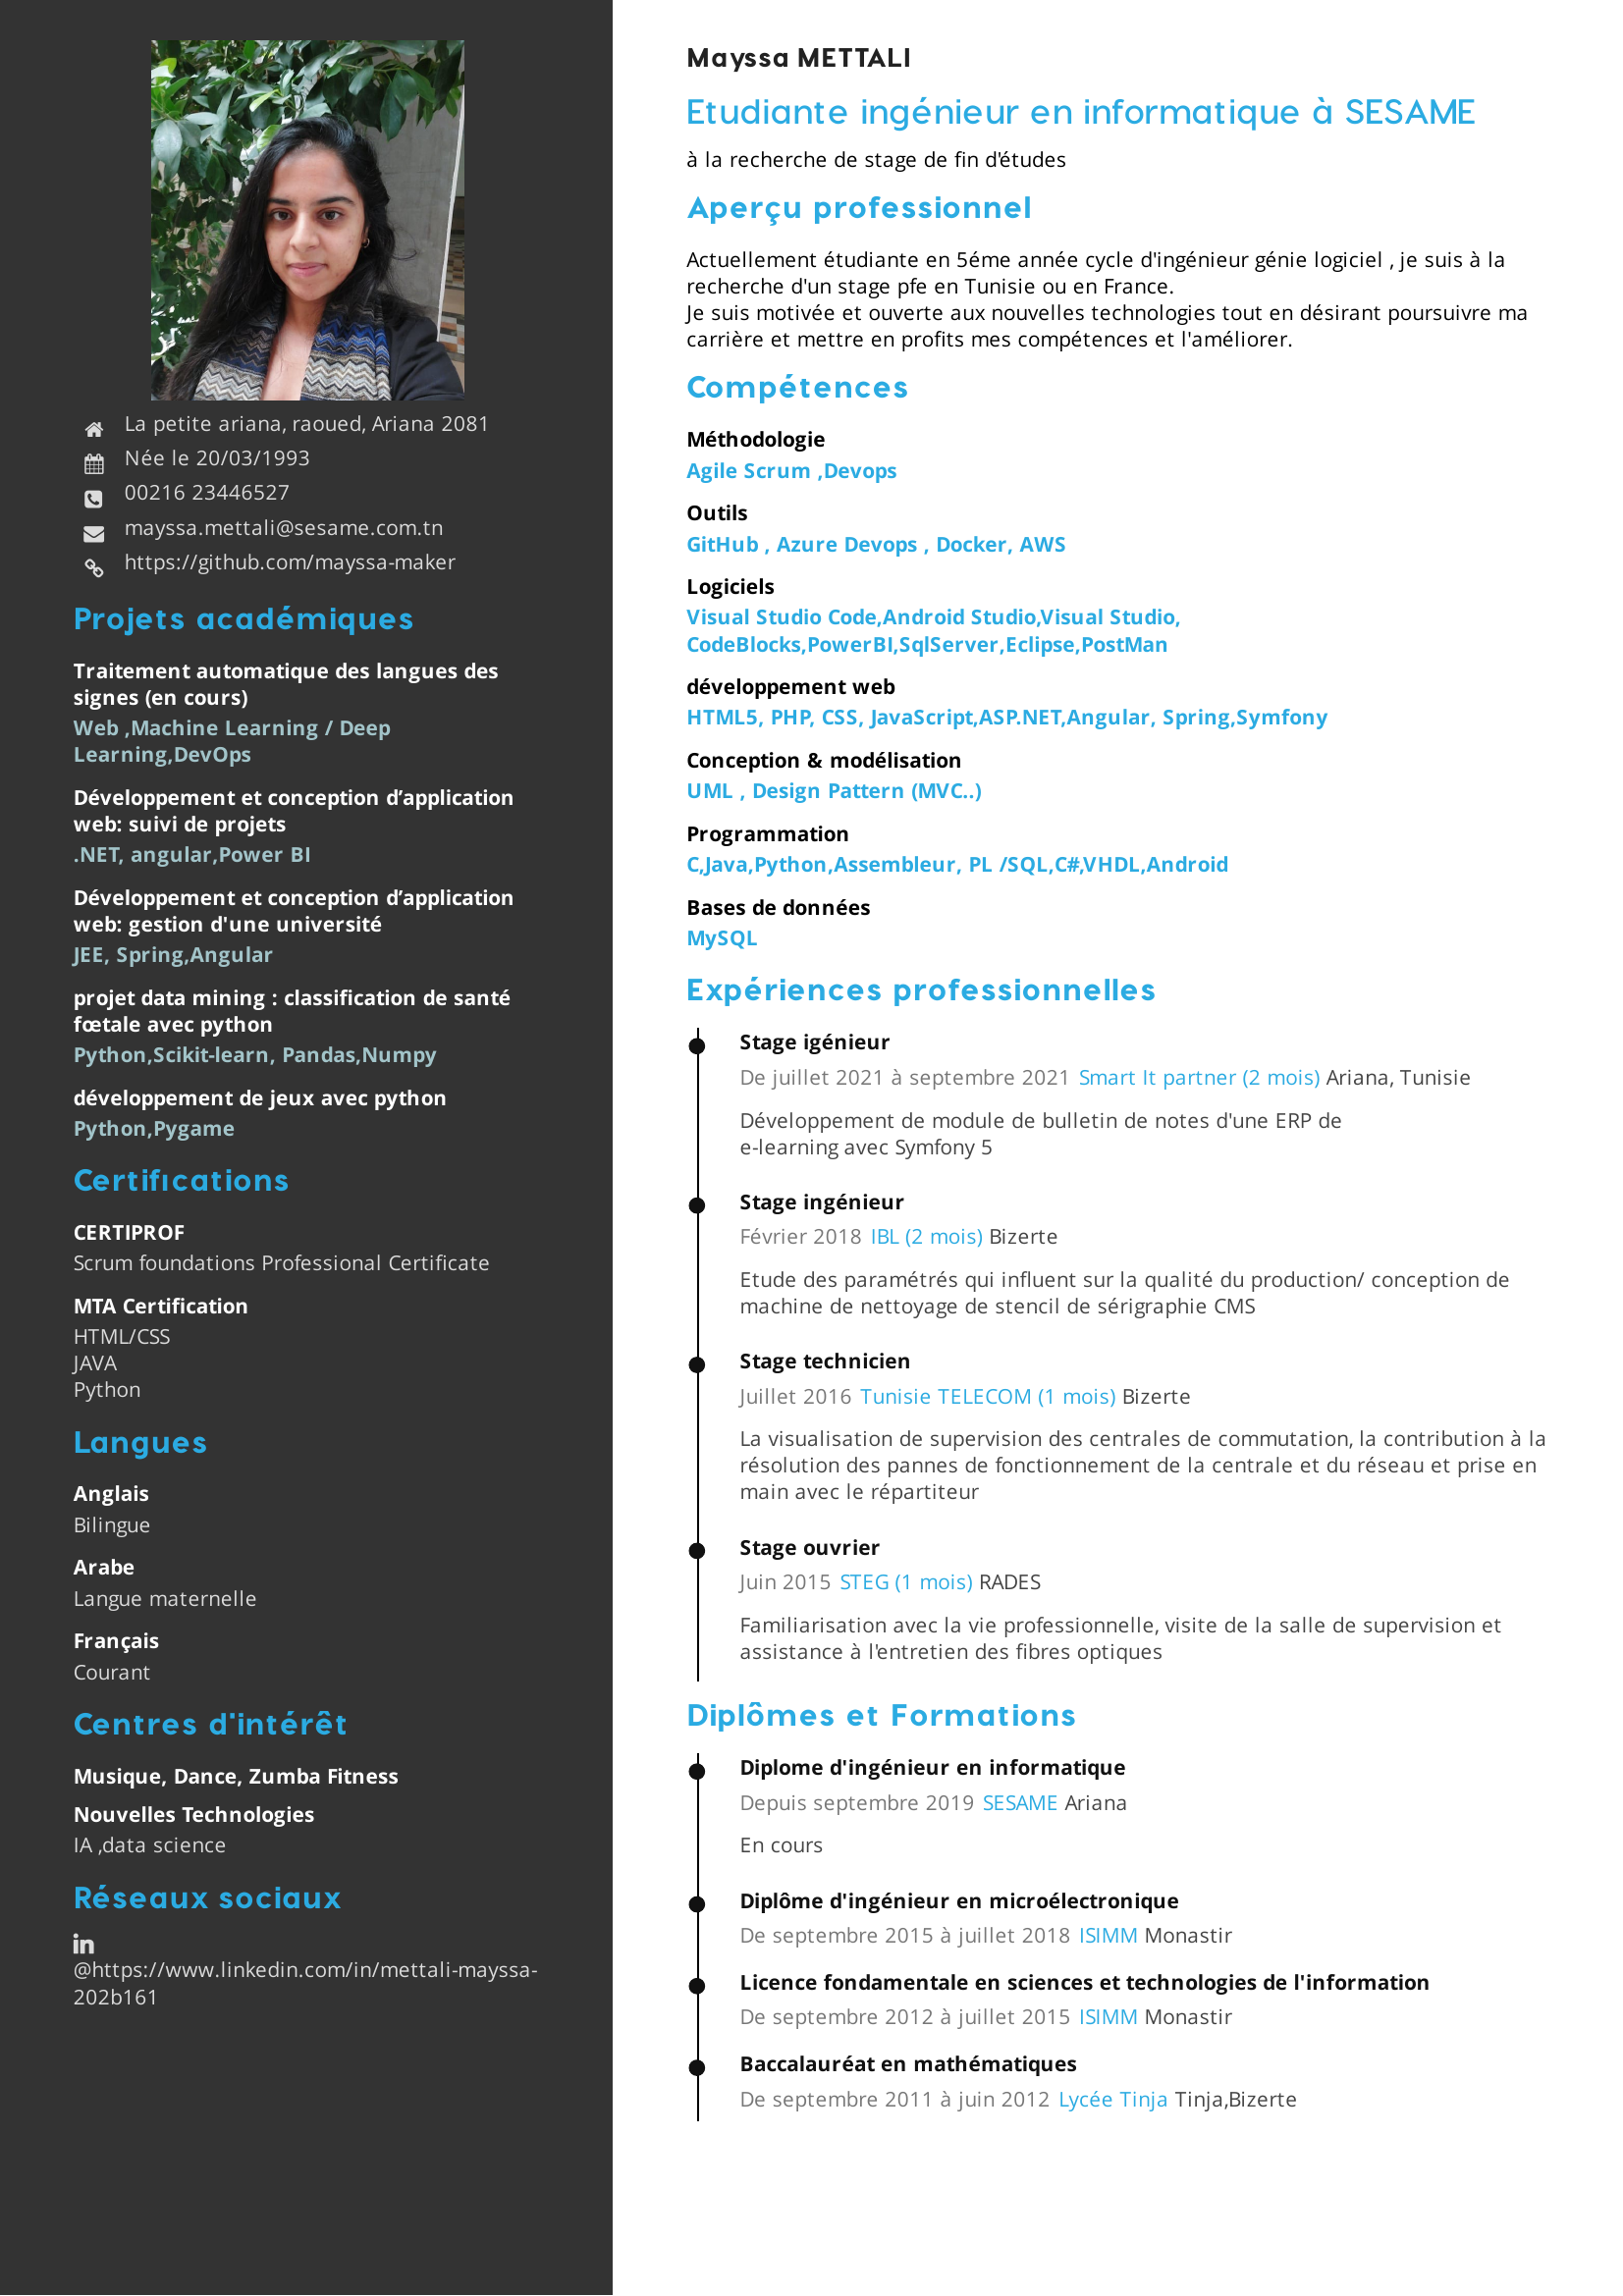

In [ ]:
from IPython.display import display, Image
display(images[0])

In [ ]:
bounds = reader.readtext(np.array(images[0]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8,decoder='beamsearch', beamWidth=10)
bounds

[([[696, 42], [935, 42], [935, 80], [696, 80]],
  'Mayssa METTALI',
  0.9867885006182392),
 ([[695, 83], [1511, 83], [1511, 143], [695, 143]],
  'Etudiante ingénieur en informatique à SESAME',
  0.9866705265114529),
 ([[698, 147], [1090, 147], [1090, 178], [698, 178]],
  "à la recherche de stage de fin d'études",
  0.8829087072918731),
 ([[699, 191], [1057, 191], [1057, 235], [699, 235]],
  'Aperçu professionnel',
  0.9996773121098235),
 ([[695, 246], [1537, 246], [1537, 283], [695, 283]],
  "Actuellement étudiante en Séme année cycle d'ingénieur génie logiciel ,je suis à Ia",
  0.5102426842190261),
 ([[696, 278], [1194, 278], [1194, 308], [696, 308]],
  "recherche d'un stage pfe en Tunisie ou en France_",
  0.5309900813685394),
 ([[692, 304], [1558, 304], [1558, 334], [692, 334]],
  'Je suis motivée et ouverte aux nouvelles technologies tout en désirant poursuivre ma',
  0.6175576064704776),
 ([[696, 330], [1320, 330], [1320, 361], [696, 361]],
  "carrière et mettre en profits mes com

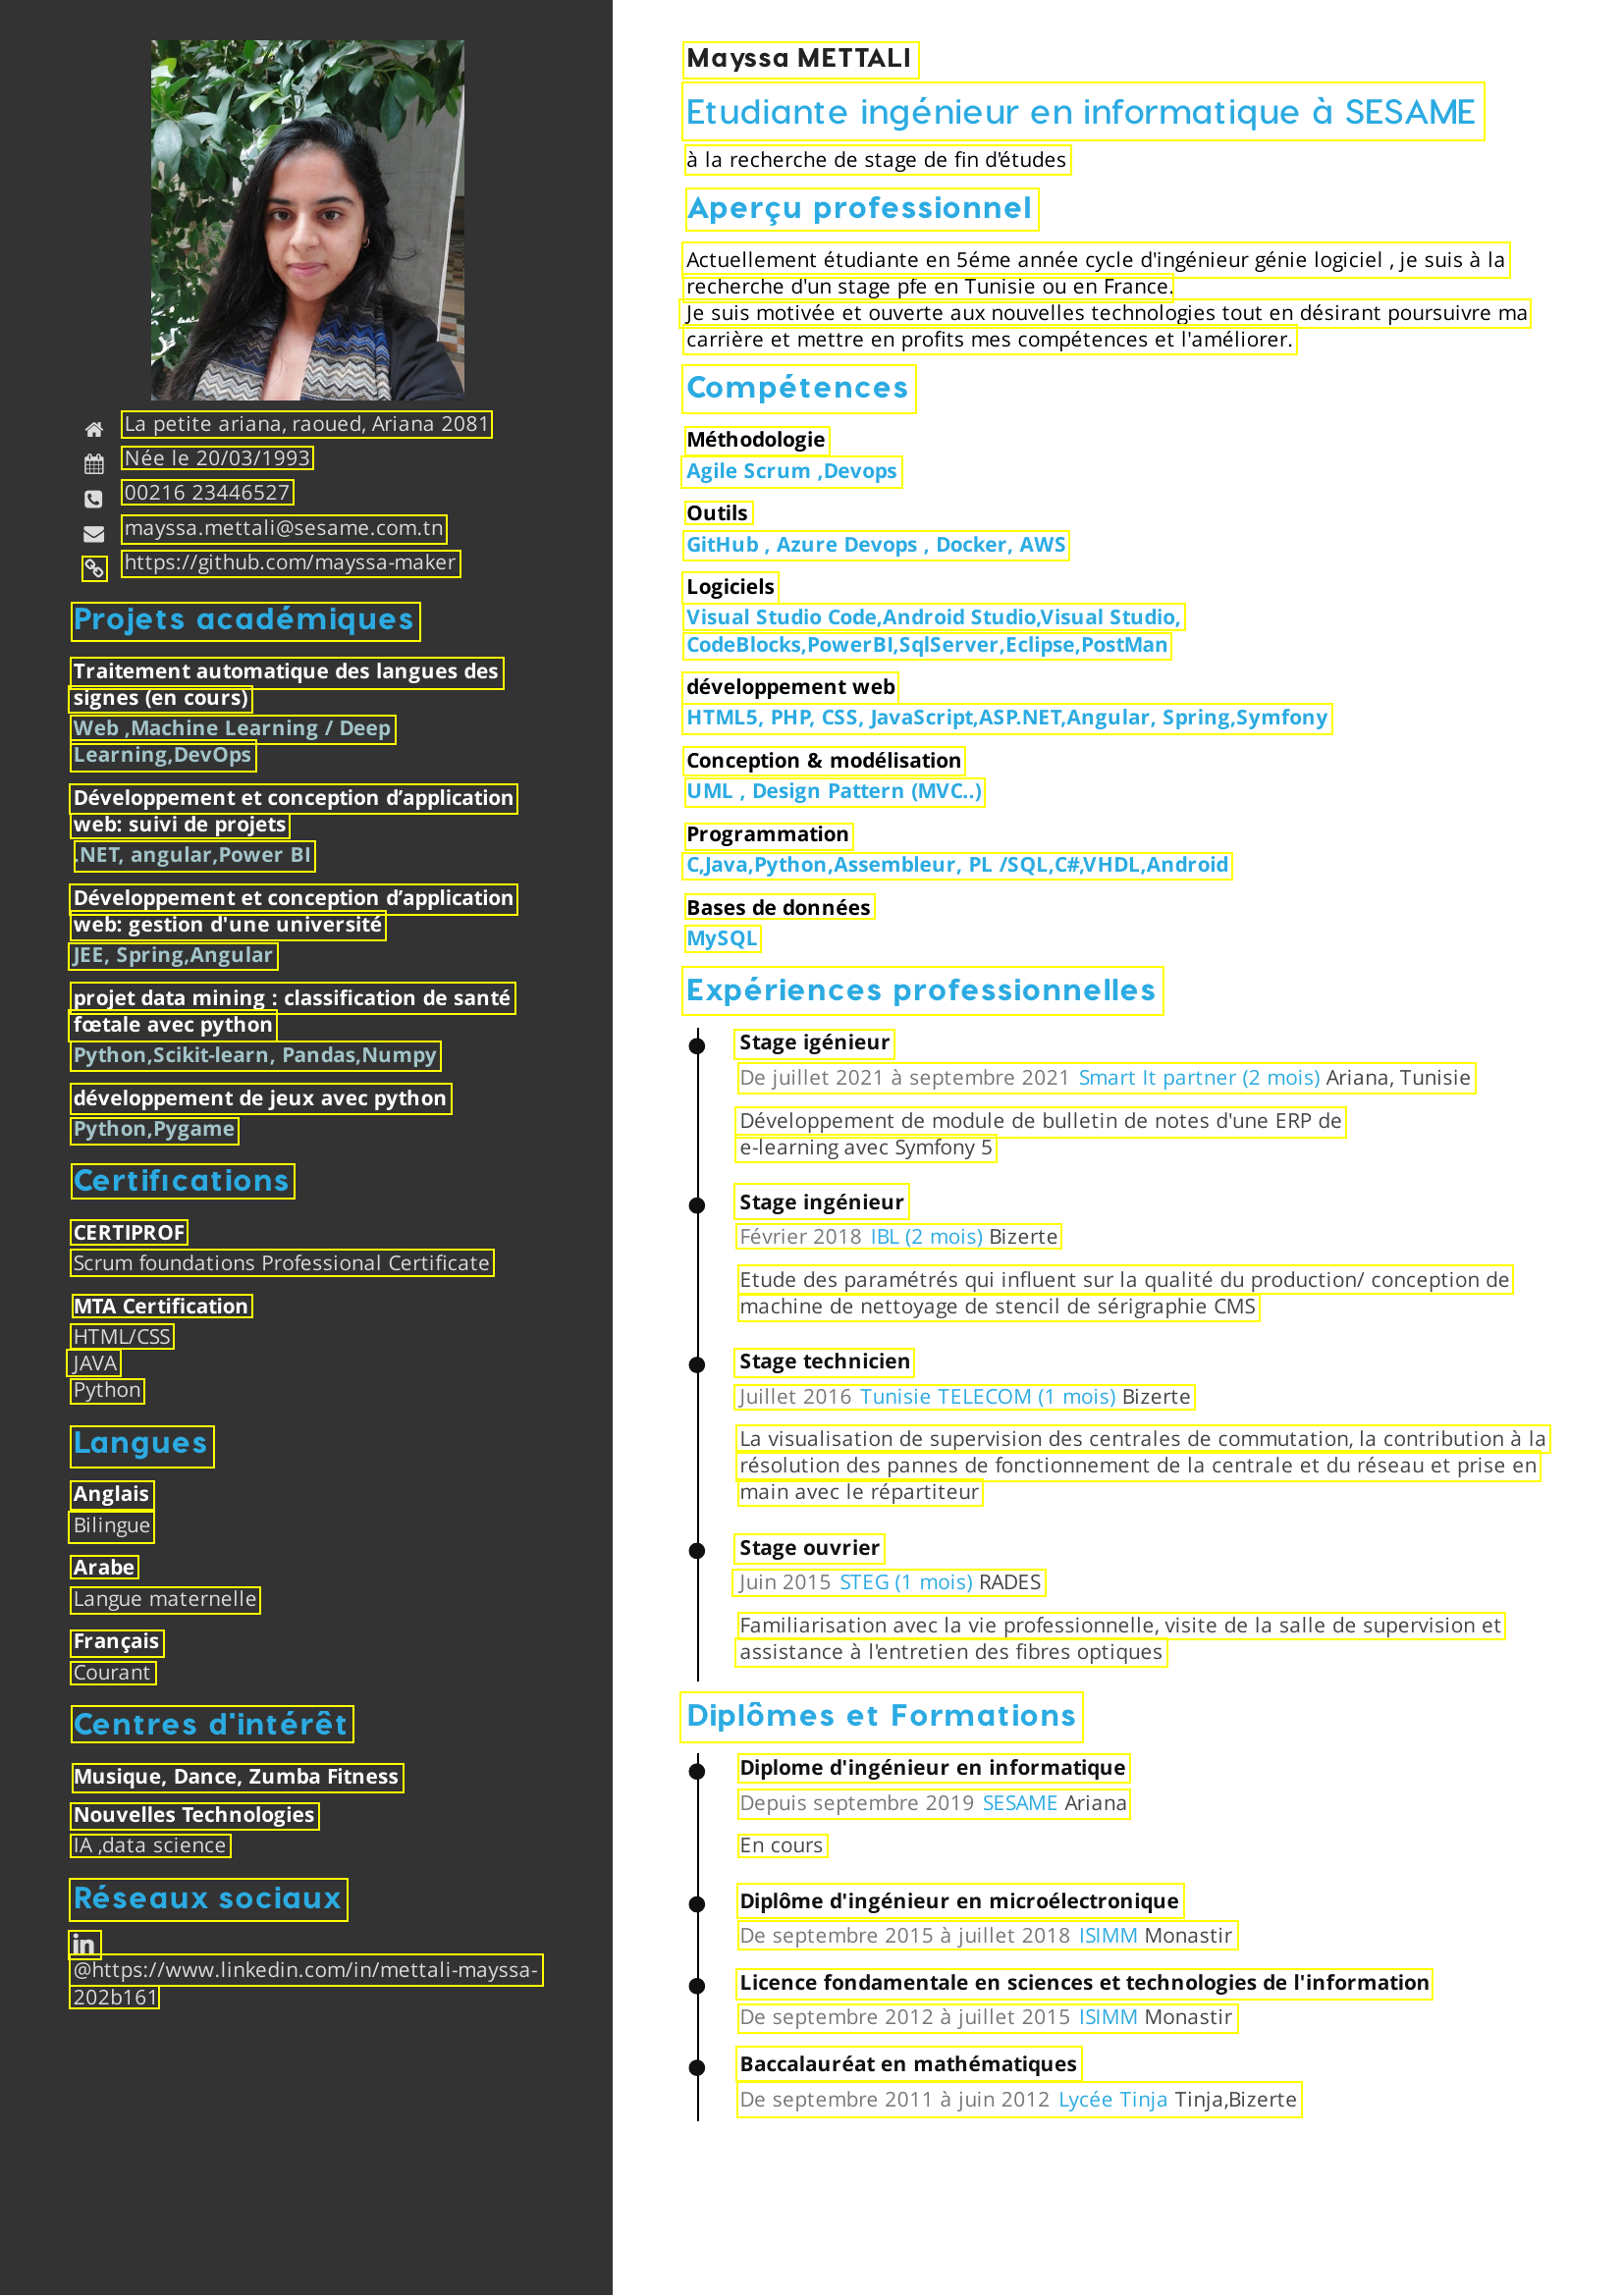

In [ ]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(images[0], bounds)

In [ ]:
bounds[1][1]

'Etudiante ingénieur en informatique à SESAME'

In [ ]:
text=''
for i in range(len(bounds)):
  text = text + bounds[i][1] +'\n'

print(text)

Mayssa METTALI
Etudiante ingénieur en informatique à SESAME
à la recherche de stage de fin d'études
Aperçu professionnel
Actuellement étudiante en Séme année cycle d'ingénieur génie logiciel ,je suis à Ia
recherche d'un stage pfe en Tunisie ou en France_
Je suis motivée et ouverte aux nouvelles technologies tout en désirant poursuivre ma
carrière et mettre en profits mes compétences et l'améliorer.
Compétences
La petite ariana, raoued, Ariana 2081
Née le 20/03/1993
Méthodologie
Agile Scrum ,Devops
00216 23446527
Outils
mayssa.mettali@sesame com.tn
GitHub , Azure Devops , Docker , AWS
%
https:/Igithub.comlmayssa-maker
Logiciels
Projets académiques
Visual Studio Code Android Studio Visual Studio,
CodeBlocks PowerBI,SqlServer, Eclipse PostMan
Traitement automatique des langues des
signes (en cours)
développement web
Web ,Machine Learning / Deep
HTMLS, PHP; CSS, JavaScript ASP NET Angular , Spring Symfony
Learning DevOps
Conception & modélisation
Développement et conception dapplication
UM

In [ ]:
nlp=spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(text)

In [ ]:
from spacy import displacy

displacy.render(nlp(doc.text),style='ent', jupyter=True)